In [21]:
import pandas as pd
data = pd.read_csv('inc_final.csv', index_col=0)

In [22]:
data.shape

(20611, 14)

In [23]:
data.head()

,opened_at,closed_at,incident_state,time,time_min,reassignment_count,reopen_count,sys_mod_count,impact,impact_ord,urgency,urgency_ord,knowledge,know_ord
number,,,,,,,,,,,,,,
INC0000045,2016-02-29 01:16:00,2016-03-05 12:00:00,Closed,5 days 10:44:00,7844.0,0,0,4,2 - Medium,2,2 - Medium,2,True,1
INC0000047,2016-02-29 04:40:00,2016-03-06 10:00:00,Closed,6 days 05:20:00,8960.0,1,0,8,2 - Medium,2,2 - Medium,2,True,1
INC0000057,2016-02-29 06:10:00,2016-03-06 03:00:00,Closed,5 days 20:50:00,8450.0,0,0,6,2 - Medium,2,2 - Medium,2,True,1
INC0000060,2016-02-29 06:38:00,2016-03-07 13:00:00,Closed,7 days 06:22:00,10462.0,0,0,3,2 - Medium,2,2 - Medium,2,True,1
INC0000062,2016-02-29 06:58:00,2016-03-05 16:00:00,Closed,5 days 09:02:00,7742.0,1,0,7,1 - High,1,2 - Medium,2,True,1


In [24]:
data.describe()

,time_min,reassignment_count,reopen_count,sys_mod_count,impact_ord,urgency_ord,know_ord
count,20611.000000,20611.000000,20611.000000,20611.000000,20611.000000,20611.000000,20611.000000
mean,11622.189122,0.468100,0.005968,4.294018,2.014555,2.008005,0.123623
std,6913.154808,0.661251,0.078889,2.921239,0.214428,0.219133,0.329159
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,7251.000000,0.000000,0.000000,2.000000,2.000000,2.000000,0.000000
50%,7547.000000,0.000000,0.000000,3.000000,2.000000,2.000000,0.000000
75%,13863.500000,1.000000,0.000000,6.000000,2.000000,2.000000,0.000000
max,36993.000000,2.000000,2.000000,17.000000,3.000000,3.000000,1.000000


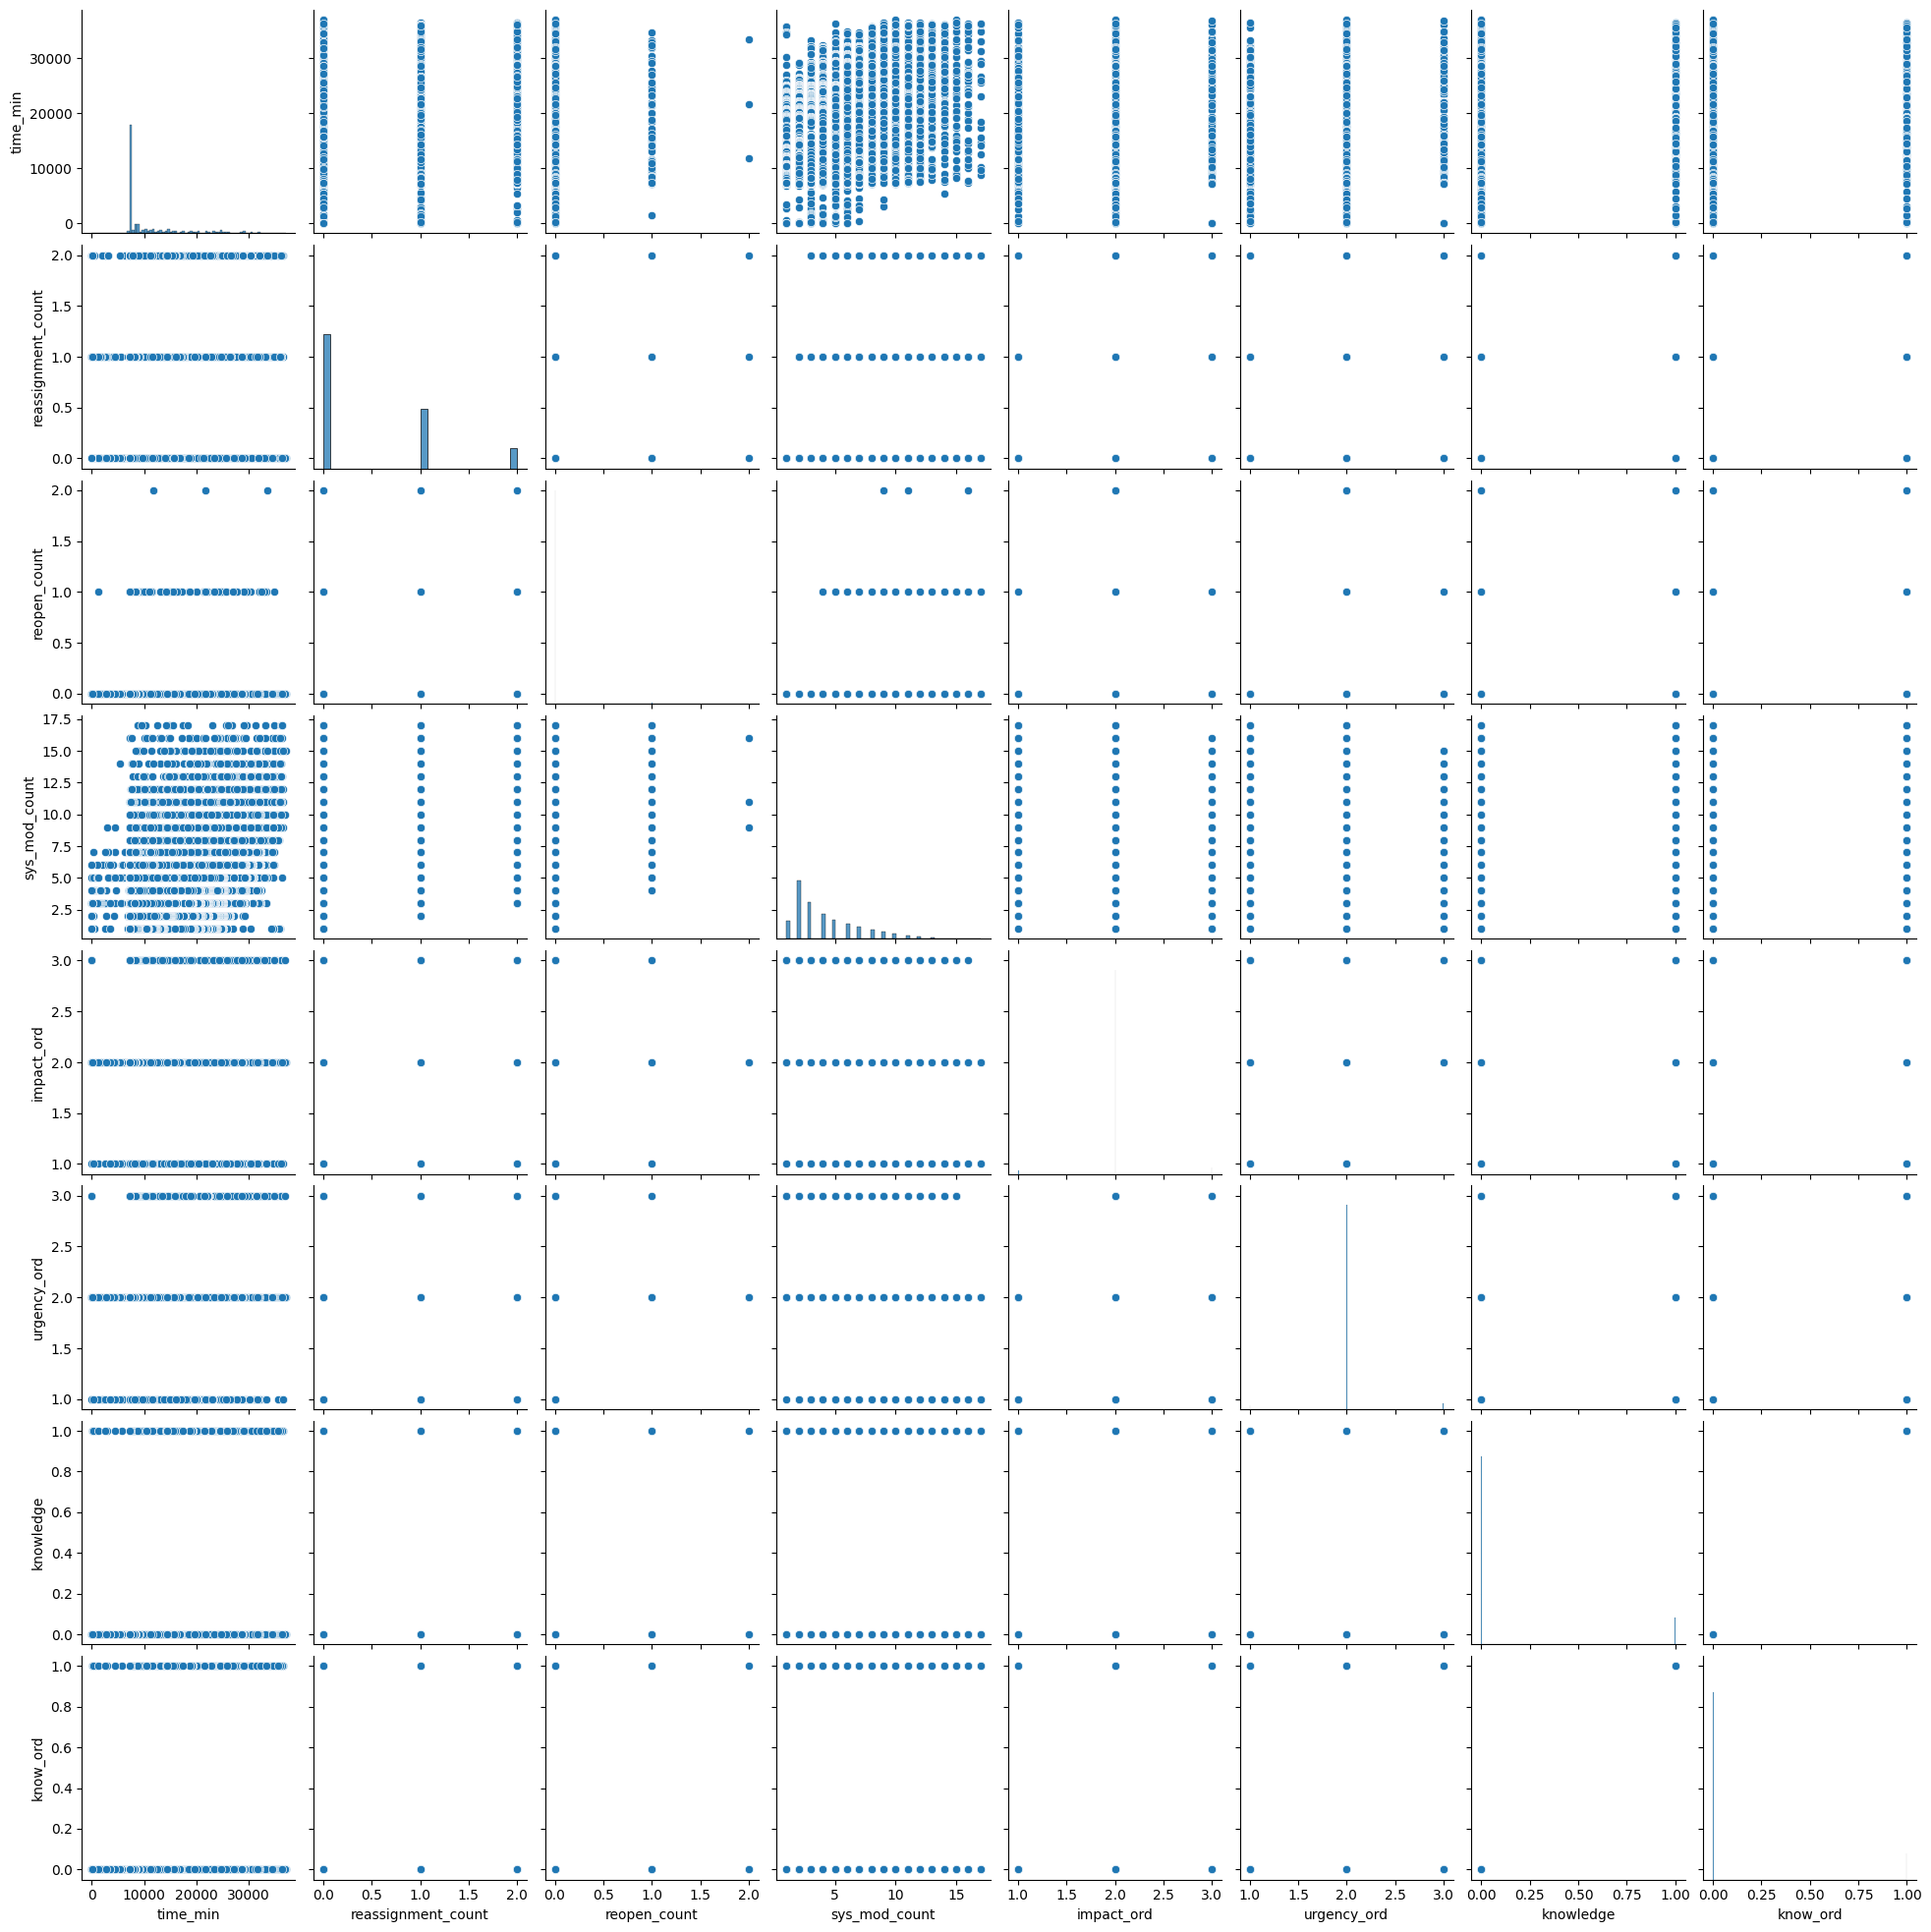

In [25]:
import seaborn as sns #para visualizacion
%matplotlib inline
sns.pairplot(data,)

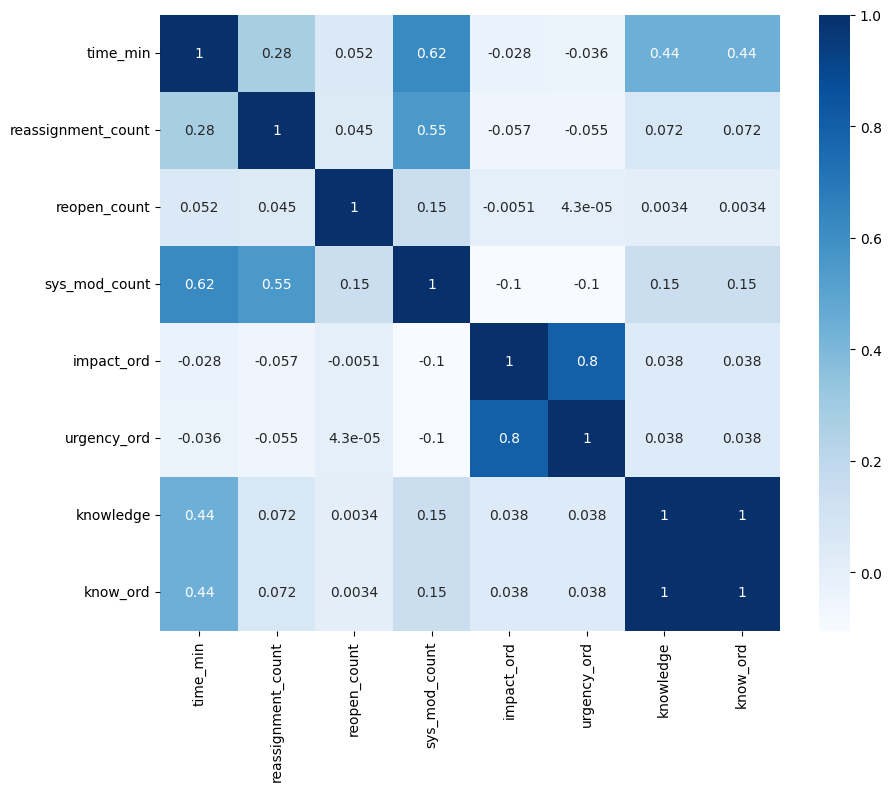

In [26]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# Seleccionar solo esas columnas
cols = [
    "time_min", "reassignment_count", "reopen_count", "sys_mod_count",
    "impact_ord", "urgency_ord", "knowledge", "know_ord"
]

subset = data[cols]

# Calcular correlación
corr = subset.corr()

# Graficar heatmap
plt.figure(figsize=(10,8))
sb.heatmap(corr, cmap="Blues", annot=True)
plt.show()


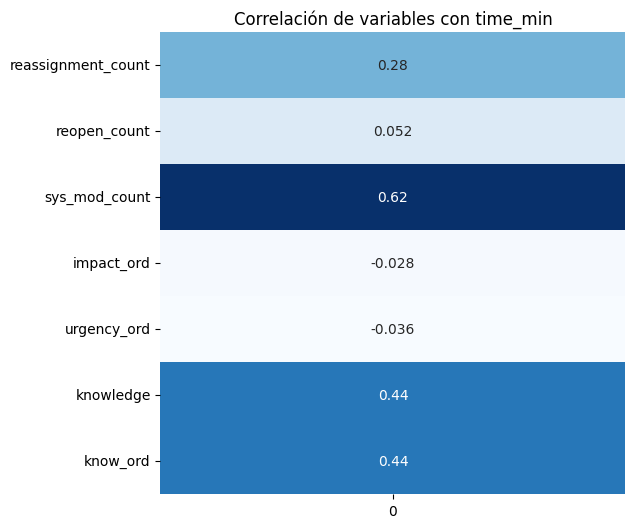

In [27]:
columns = [
    "time_min", "reassignment_count", "reopen_count", "sys_mod_count",
    "impact_ord", "urgency_ord", "knowledge", "know_ord"
]

subset = data[columns]

# Calcular correlación de cada variable con 'time_min'
corrw = subset.drop(['time_min'], axis=1).corrwith(subset['time_min'])

# Convertir a DataFrame para el heatmap
plt.figure(figsize=(6,6))
sb.heatmap(pd.DataFrame(corrw), cmap="Blues", annot=True, cbar=False)
plt.title("Correlación de variables con time_min")
plt.show()

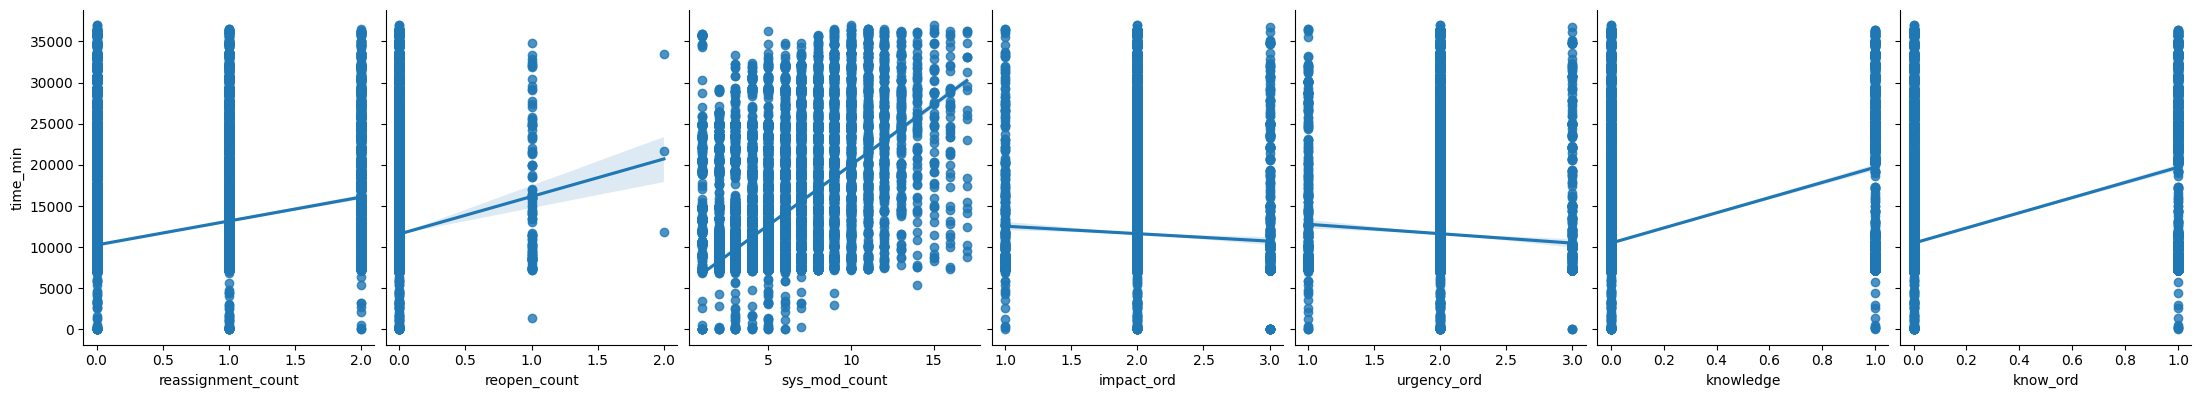

In [28]:
x_vars = ['reassignment_count', 'reopen_count', 'sys_mod_count',
          'impact_ord', 'urgency_ord', 'knowledge', 'know_ord']
y_var = 'time_min'

# Graficar pairplot con regresión
sns.pairplot(data, x_vars=x_vars, y_vars=y_var, height=4, aspect=0.8, kind='reg')
plt.show()

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Definir features y target
features = ['reassignment_count', 'reopen_count', 'sys_mod_count',
            'impact_ord', 'urgency_ord', 'knowledge', 'know_ord']
X = data[features]
y = data['time_min']

# Dividir en entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Predicciones
y_pred = linreg.predict(X_test)

# Métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Coeficientes:", dict(zip(features, linreg.coef_)))
print("Intercepto:", linreg.intercept_)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

Coeficientes: {'reassignment_count': np.float64(-928.2692563201967), 'reopen_count': np.float64(-3432.7749646900356), 'sys_mod_count': np.float64(1492.9505832031157), 'impact_ord': np.float64(831.3480240006307), 'urgency_ord': np.float64(-525.8903387744906), 'knowledge': np.float64(3709.3101249030906), 'know_ord': np.float64(3709.3101249030697)}
Intercepto: 4136.044200622018
MAE: 3316.887441366747
MSE: 24257849.08278596
RMSE: 4925.225790030946


In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def evaluar_modelo(features):
    X = data[features]
    y = data['time_min']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print("\nModelo con features:", features)
    print("Coeficientes:", dict(zip(features, linreg.coef_)))
    print("Intercepto:", linreg.intercept_)
    print("MAE:", mae)
    print("MSE:", mse)
    print("RMSE:", rmse)

# Modelo con todas las variables
features1 = ['reassignment_count','reopen_count','sys_mod_count','impact_ord','urgency_ord','knowledge']
evaluar_modelo(features1)

#1.MAE predice con menor error absoluto medio.
#1.RMSE menor dispersión de los errores grandes.

# Modelo con las variables que mas se correlacionan sin urgency_ord
features2 = ['reassignment_count','reopen_count','sys_mod_count','impact_ord','knowledge']
evaluar_modelo(features2)

# Modelo con las variables que mas se correlacionan sin impact_ord
features9 = ['reassignment_count','reopen_count','sys_mod_count','urgency_ord', 'knowledge']
evaluar_modelo(features9)

# Modelo con las variables que mas se correlacionan
features3 = ['reassignment_count','reopen_count','sys_mod_count','knowledge']
evaluar_modelo(features3)


Modelo con features: ['reassignment_count', 'reopen_count', 'sys_mod_count', 'impact_ord', 'urgency_ord', 'knowledge']
Coeficientes: {'reassignment_count': np.float64(-928.2692563201971), 'reopen_count': np.float64(-3432.7749646900597), 'sys_mod_count': np.float64(1492.9505832031152), 'impact_ord': np.float64(831.3480240006322), 'urgency_ord': np.float64(-525.8903387744898), 'knowledge': np.float64(7418.620249806133)}
Intercepto: 4136.044200622019
MAE: 3316.887441366749
MSE: 24257849.08278596
RMSE: 4925.225790030946

Modelo con features: ['reassignment_count', 'reopen_count', 'sys_mod_count', 'impact_ord', 'knowledge']
Coeficientes: {'reassignment_count': np.float64(-929.2002403986452), 'reopen_count': np.float64(-3444.9483085002553), 'sys_mod_count': np.float64(1494.0707661035033), 'impact_ord': np.float64(406.5233857131978), 'knowledge': np.float64(7414.193925817764)}
Intercepto: 3931.508387617123
MAE: 3314.6848951346865
MSE: 24243939.91083822
RMSE: 4923.813553622661

Modelo con fea

In [34]:
# Modelo solo las más correlacionadas
features5 = ['sys_mod_count','knowledge','reassignment_count']
evaluar_modelo(features5)

# Modelo quitamos reopen_count, impact_ord, urgency_ord
features6 = ['sys_mod_count','knowledge']
evaluar_modelo(features6)

# Modelo probamos con solo sys_mod_count
features7 = ['sys_mod_count']
evaluar_modelo(features7)

# Modelo probamos con knowledge solo
features8 = ['knowledge']
evaluar_modelo(features8)


Modelo con features: ['sys_mod_count', 'knowledge', 'reassignment_count']
Coeficientes: {'sys_mod_count': np.float64(1472.978348688359), 'knowledge': np.float64(7450.1378927707), 'reassignment_count': np.float64(-904.5586207179804)}
Intercepto: 4804.465202383643
MAE: 3322.0693403187856
MSE: 24316895.52622777
RMSE: 4931.216434737758

Modelo con features: ['sys_mod_count', 'knowledge']
Coeficientes: {'sys_mod_count': np.float64(1358.347039048136), 'knowledge': np.float64(7465.718581098592)}
Intercepto: 4872.492366035875
MAE: 3319.780832907906
MSE: 24582324.01832926
RMSE: 4958.0564759116305

Modelo con features: ['sys_mod_count']
Coeficientes: {'sys_mod_count': np.float64(1486.2378700118022)}
Intercepto: 5266.063131135158
MAE: 3777.4625990062764
MSE: 30163159.042832404
RMSE: 5492.099693453534

Modelo con features: ['knowledge']
Coeficientes: {'knowledge': np.float64(9269.036554534814)}
Intercepto: 10463.312651814782
MAE: 4588.987699514784
MSE: 38166533.937705
RMSE: 6177.906922065515
